# Import Library

In this section, we import various Python libraries that will help us perform data manipulation, visualization, preprocessing, and build machine learning regression models. Each library serves a specific purpose — from handling data to evaluating and visualizing model performance.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

- **pandas (`pd`)**: Used for data manipulation and analysis. It allows easy handling of structured data such as CSV, Excel, or SQL data.
- **numpy (`np`)**: Provides mathematical functions and efficient operations on numerical arrays or matrices.
- **matplotlib.pyplot (`plt`)**: A plotting library used to create visualizations like line charts, bar charts, scatter plots, etc.
- **seaborn (`sns`)**: Built on top of Matplotlib, Seaborn provides a higher-level interface for making attractive and informative statistical graphics.

```python
from sklearn... import ...
```

- **sklearn**: This library is used for machine learning tasks such as classification, regression, clustering, and more. It provides a wide range of tools and algorithms to build and evaluate machine learning models.

```python
from xgboost import XGBRegressor
```

- **XGBRegressor**: This is an optimized version of gradient boosting that includes additional features and optimizations. It is known for its high performance and efficiency, especially on larger datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

from sklearn.svm import SVR
from xgboost import XGBRegressor

---

# Reading Dataset

In this part of the code, we are reading the dataset that contains the training and testing data for our machine learning model. The dataset is stored in a CSV (Comma-Separated Values) file, which is a common format for storing tabular data. We use the `pd.read_csv()` function from the `pandas` library to read the dataset into a DataFrame, which is a two-dimensional data structure that resembles a table.

In [2]:
data = pd.read_csv("data/burnout_submissions.csv")

data.describe()

,usia,jumlah_anak,usia_anak,lama_bekerja,waktu_bekerja_seminggu,beban_sks,mhs_bimbingan,work_life_balance,gaji_sesuai,1_tidak_mampu,...,4_waktu_tidak_cukup,5_tidak_berjalan_baik,6_terburu_buru,7_tidak_ada_jalan_keluar,8_masalah_menumpuk,9_ingin_menyerah,10_memikul_beban_berat,personal_vulnerability_ganjil,event_load_genap,skor_total
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,33.363636,0.818182,1.818182,6.363636,51.090909,22.538182,11.818182,3.000000,3.000000,2.090909,...,3.272727,2.0,3.181818,1.818182,2.636364,1.727273,2.545455,9.727273,14.636364,24.363636
std,3.384456,0.873863,2.088932,3.413875,6.992203,9.937572,9.526995,1.095445,1.095445,1.136182,...,1.678744,1.0,1.401298,0.981650,1.286291,1.272078,1.368476,4.649536,5.749308,9.749592
min,26.000000,0.000000,0.000000,0.000000,40.000000,10.000000,0.000000,2.000000,2.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,10.000000
25%,31.500000,0.000000,0.000000,6.000000,45.500000,16.500000,5.000000,2.000000,2.000000,1.000000,...,2.000000,1.0,2.500000,1.000000,2.000000,1.000000,1.500000,6.000000,10.000000,16.000000
50%,34.000000,1.000000,2.000000,7.000000,50.000000,21.000000,9.000000,3.000000,3.000000,2.000000,...,4.000000,2.0,3.000000,2.000000,2.000000,1.000000,2.000000,11.000000,16.000000,25.000000
75%,35.500000,1.500000,3.000000,8.500000,58.000000,29.935000,17.000000,4.000000,4.000000,2.500000,...,5.000000,2.5,4.000000,2.000000,3.500000,2.000000,3.500000,12.000000,19.000000,31.500000
max,38.000000,2.000000,6.000000,10.000000,60.000000,43.000000,30.000000,5.000000,5.000000,4.000000,...,5.000000,4.0,5.000000,4.000000,5.000000,5.000000,5.000000,20.000000,22.000000,41.000000


# Define Features and Target

In this part of the code, we define which columns from our dataset will be used as **features (input variables)** and which column will be used as the **target (output variable)** for the regression model.

The goal here is to separate the data into two main parts:

* **`X` (features):** the variables that will be used by the model to make predictions.
* **`y` (target):** the variable that we want the model to predict — in this case, the **total stress score (`skor_total`)**.

In [3]:
features_to_drop = [
    'tinggal_dengan_siapa', 'kesehatan_fisik', 'kondisi_mental',
    '1_tidak_mampu', '2_kewalahan_tanggung_jawab', '3_keadaan_tidak_berpihak',
    '4_waktu_tidak_cukup', '5_tidak_berjalan_baik', '6_terburu_buru',
    '7_tidak_ada_jalan_keluar', '8_masalah_menumpuk', '9_ingin_menyerah',
    '10_memikul_beban_berat', 'personal_vulnerability_ganjil', 'PV',
    'event_load_genap', 'EV', 'skor_total', 'risiko_stres'
]

X = data.drop(columns=features_to_drop)
y = data['skor_total']

In [4]:
print(f"Number of Features: {len(X.columns)}")
print(f"Features: {X.columns.tolist()}")

Number of Features: 44
Features: ['usia', 'jenis_kelamin', 'kota_asal', 'status_pernikahan', 'jumlah_anak', 'usia_anak', 'tinggal_sendiri', 'tinggal_pasangan', 'tinggal_anak', 'tinggal_ortu', 'tinggal_mertua', 'tinggal_saudara', 'tinggal_teman', 'profesi', 'bidang', 'lama_bekerja', 'mode_bekerja', 'jarak', 'waktu_bekerja_seminggu', 'beban_sks', 'mhs_bimbingan', 'jabatan_struktural', 'jabatan_fungsional', 'sertifikasi', 'status_keaktifan', 'fisik_mata', 'fisik_punggung', 'fisik_tensi', 'fisik_lemah', 'fisik_kepala', 'fisik_obesitas', 'fisik_imun', 'fisik_carpal', 'mental_anxiety', 'mental_burnout', 'mental_depresi', 'mental_distress', 'mental_konsentrasi', 'mental_insomnia', 'mental_iritate', 'mental_lelah', 'mental_stres', 'work_life_balance', 'gaji_sesuai']


---

# Preprocessing Non-Numerical Features

Not all features in a dataset are numerical. Some columns may contain **categorical data** (e.g., gender, job position, or living situation) or **boolean values** (e.g., yes/no). Since most machine learning models require numerical input, these categorical variables need to be transformed into numbers.

In this part of the code, we identify which features are **numerical** and which are **categorical**, and then apply different preprocessing steps using **`ColumnTransformer`** — scaling numerical data and encoding categorical data.

## Step Explanation

* **`numerical_features`** → Selects all numeric columns (`int64`, `float64`) to be standardized using `StandardScaler`.
* **`categorical_features`** → Selects all non-numeric columns (`object`, `bool`) that require encoding into numbers.
* **`ColumnTransformer`** → Combines preprocessing steps for different feature types:

  * `'num'`: Applies **`StandardScaler`** to numerical columns so that all values have a mean of 0 and a standard deviation of 1.
  * `'cat'`: Applies **`OneHotEncoder`** to categorical columns, converting each category into a binary column (0 or 1).
  * `remainder='passthrough'`: Keeps any remaining columns unchanged.

## About One-Hot Encoding

**One-Hot Encoding** is a method for converting categorical data into a numerical form that machine learning algorithms can interpret. Instead of assigning arbitrary numbers (like 1, 2, 3), which would imply an order or ranking, one-hot encoding creates **binary columns** for each unique category.

This ensures that the model treats categories equally without assuming any hierarchy.

### One-Hot Encoding Explained

Suppose we have a column named `living_status` with three categories: `"Alone"`, `"With Family"`, and `"With Friends"`.

Original data:

| living_status |
| ------------- |
| Alone         |
| With Family   |
| With Friends  |
| Alone         |
| With Family   |

After applying one-hot encoding, it becomes:

| living_status_Alone | living_status_WithFamily | living_status_WithFriends |
| ------------------- | ------------------------ | ------------------------- |
| 1                   | 0                        | 0                         |
| 0                   | 1                        | 0                         |
| 0                   | 0                        | 1                         |
| 1                   | 0                        | 0                         |
| 0                   | 1                        | 0                         |

## Why This Step Matters

* Ensures **all input data is numerical**, which is required for most machine learning algorithms.
* Prevents **bias or errors** from arbitrary numeric category encoding.
* Makes model training **consistent and reliable**, especially when unseen categories appear in the test set (handled by `handle_unknown='ignore'`).

By preprocessing both numerical and categorical features properly, we ensure that the dataset is fully prepared for **model training and evaluation**.


In [5]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['usia', 'jumlah_anak', 'usia_anak', 'lama_bekerja', 'waktu_bekerja_seminggu', 'beban_sks', 'mhs_bimbingan', 'work_life_balance', 'gaji_sesuai']
Categorical Features: ['jenis_kelamin', 'kota_asal', 'status_pernikahan', 'tinggal_sendiri', 'tinggal_pasangan', 'tinggal_anak', 'tinggal_ortu', 'tinggal_mertua', 'tinggal_saudara', 'tinggal_teman', 'profesi', 'bidang', 'mode_bekerja', 'jarak', 'jabatan_struktural', 'jabatan_fungsional', 'sertifikasi', 'status_keaktifan', 'fisik_mata', 'fisik_punggung', 'fisik_tensi', 'fisik_lemah', 'fisik_kepala', 'fisik_obesitas', 'fisik_imun', 'fisik_carpal', 'mental_anxiety', 'mental_burnout', 'mental_depresi', 'mental_distress', 'mental_konsentrasi', 'mental_insomnia', 'mental_iritate', 'mental_lelah', 'mental_stres']


In [6]:
# Preprocessing results check
# First, fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
feature_names_after = preprocessor.get_feature_names_out()

print(f"Number of features before preprocessing: {X.shape[1]}")
print(f"Number of features after preprocessing: {X_preprocessed.shape[1]}")
print(f"\nShape of original data: {X.shape}")
print(f"Shape of data after preprocessing: {X_preprocessed.shape}")

print(f"\n{'='*80}")
print("Feature names after preprocessing:")
print(f"{'='*80}")
for i, name in enumerate(feature_names_after, 1):
    print(f"{i:3d}. {name}")

# Convert to DataFrame to see the first few rows
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names_after)
print(f"\n{'='*80}")
print("First 5 rows of data after preprocessing:")
print(f"{'='*80}")
print(X_preprocessed_df.head())

print(f"\n{'='*80}")
print("Descriptive statistics of data after preprocessing:")
print(f"{'='*80}")
print(X_preprocessed_df.describe())

Number of features before preprocessing: 44
Number of features after preprocessing: 107

Shape of original data: (11, 44)
Shape of data after preprocessing: (11, 107)

Feature names after preprocessing:
  1. num__usia
  2. num__jumlah_anak
  3. num__usia_anak
  4. num__lama_bekerja
  5. num__waktu_bekerja_seminggu
  6. num__beban_sks
  7. num__mhs_bimbingan
  8. num__work_life_balance
  9. num__gaji_sesuai
 10. cat__jenis_kelamin_Laki-laki
 11. cat__jenis_kelamin_Perempuan
 12. cat__kota_asal_Bandar Lampung
 13. cat__kota_asal_Jembrana, Bali
 14. cat__kota_asal_Lampung
 15. cat__kota_asal_Lampung Selatan
 16. cat__kota_asal_Medan
 17. cat__kota_asal_Padangsidimpuan
 18. cat__kota_asal_Salatiga
 19. cat__kota_asal_Semarang
 20. cat__kota_asal_Yogyakarta 
 21. cat__status_pernikahan_Belum Menikah
 22. cat__status_pernikahan_Sudah Menikah
 23. cat__tinggal_sendiri_False
 24. cat__tinggal_sendiri_True
 25. cat__tinggal_pasangan_False
 26. cat__tinggal_pasangan_True
 27. cat__tinggal_anak_F

---

# Splitting Data Into 5 Folds

```python
kf = KFold(n_splits=5, shuffle=True, random_state=2024)
```

This line initializes a K-Fold cross-validator from scikit-learn's model selection module. Let's break down the parameters:

- `n_splits=5`: This sets up 5-fold cross-validation. The data will be divided into 5 equal parts or "folds".
- `shuffle=True`: This parameter tells the cross-validator to shuffle the data before splitting it into folds. This helps to ensure that the order of the data doesn't affect the results.
- `random_state=2024`: This sets a specific random seed for reproducibility. Using the same random state will ensure that the data is shuffled in the same way every time the code is run.

In 5-fold cross-validation:
1. The data is divided into 5 equal subsets or folds.
2. The model is trained on 4 folds and tested on the remaining fold.
3. This process is repeated 5 times, with each fold serving as the test set exactly once.
4. The performance metrics are then averaged across all 5 iterations.

This method helps to get a more robust estimate of the model's performance by using all the data for both training and testing.

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=2024)

---

# Define Model

In this experiment, I tried to simultaneously use five models: LinearRegression, XGBoost, RandomForest, GradientBoosting, and Support Vector Machine. The model that performs best will be used to make predictions on the test set.

In [8]:
models = {
    'LR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'XGB': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=2024, verbosity=1))]),
    'RFR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=2024, verbose=1))]),
    'GBR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=2024, verbose=1))]),
    'SVR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1, verbose=True))])
}

In [9]:
results = {model: {'r2': [], 'rmse': [], 'mae': []} for model in models}

---

# Training

In this part of the code, we are training the machine learning model using the training data. The model learns the relationship between the input features and the target variable by adjusting its internal parameters based on the training data. The goal is to minimize the error between the predicted values and the actual values in the training set.

In [10]:
for fold_num, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    print(f"\n{'='*60}")
    print(f"FOLD {fold_num}/5")
    print(f"{'='*60}")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

    for name, model in models.items():
        print(f"\n  Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = np.mean(np.abs(y_test - y_pred))
        
        results[name]['r2'].append(r2)
        results[name]['rmse'].append(rmse)
        results[name]['mae'].append(mae)
        
        print(f"    → R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

print(f"\n{'='*60}")
print("Training completed!")
print(f"{'='*60}")


FOLD 1/5
Training samples: 8, Test samples: 3

  Training LR...
    → R²: -1.1021, RMSE: 14.3204, MAE: 13.0623

  Training XGB...
    → R²: -0.8307, RMSE: 13.3640, MAE: 11.4186

  Training RFR...
    → R²: 0.0289, RMSE: 9.7334, MAE: 8.6067

  Training GBR...
      Iter       Train Loss   Remaining Time 
         1          66.4548            0.37s
         2          53.8759            0.19s
         3          43.6870            0.13s
         4          35.4340            0.10s
         5          28.7490            0.08s
         6          23.3342            0.07s
         7          18.9482            0.06s
         8          15.3955            0.05s
         9          12.5056            0.05s
        10          10.1647            0.04s
        20           1.2811            0.02s
        30           0.1627            0.02s
        40           0.0210            0.01s
        50           0.0027            0.01s
        60           0.0004            0.01s
        70         

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


    → R²: -2.2818, RMSE: 16.3041, MAE: 13.3950

  Training GBR...
      Iter       Train Loss   Remaining Time 
         1          58.2772            0.02s
         2          47.3418            0.02s
         3          38.4841            0.02s
         4          31.3058            0.02s
         5          25.4834            0.02s
         6          20.7649            0.01s
         7          16.9368            0.01s
         8          13.8346            0.01s
         9          11.3347            0.01s
        10           9.2479            0.01s
        20           1.2507            0.01s
        30           0.1690            0.01s
        40           0.0228            0.01s
        50           0.0028            0.01s
        60           0.0004            0.01s
        70           0.0000            0.00s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
    → R²: -3.8935, RMSE: 19.9092,

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


    → R²: 0.1143, RMSE: 7.0582, MAE: 5.3100

  Training GBR...
      Iter       Train Loss   Remaining Time 
         1          75.6557            0.03s
         2          62.2250            0.03s
         3          50.4796            0.02s
         4          40.9521            0.02s
         5          33.2319            0.02s
         6          26.9681            0.02s
         7          21.8926            0.02s
         8          17.7736            0.02s
         9          14.4361            0.01s
        10          11.7268            0.01s
        20           1.5035            0.01s
        30           0.1943            0.01s
        40           0.0252            0.01s
        50           0.0033            0.01s
        60           0.0004            0.00s
        70           0.0001            0.00s
        80           0.0000            0.00s
        90           0.0000            0.00s
       100           0.0000            0.00s
    → R²: -1.2364, RMSE: 11.2159, MA

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


---

# Evaluate Model

We use three metrics to evaluate the performance of the model:
* R2 Score: It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. The R2 score ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no relationship between the independent and dependent variables.
* RMSE (Root Mean Squared Error): It is a measure of the differences between values predicted by a model and the values observed. It is the square root of the average of the squared differences between the predicted and actual values.
* MAE (Mean Absolute Error): It is a measure of errors between paired observations expressing the same phenomenon. It is the average of the absolute differences between the predicted and actual values.

In [11]:
for name, metrics in results.items():
    print(f"{name} Results:")
    print(f"Average R-squared: {np.mean(metrics['r2']):.4f} (+/- {np.std(metrics['r2']):.4f})")
    print(f"Average RMSE: {np.mean(metrics['rmse']):.4f} (+/- {np.std(metrics['rmse']):.4f})")
    print(f"Average MAE: {np.mean(metrics['mae']):.4f} (+/- {np.std(metrics['mae']):.4f})")
    print()

LR Results:
Average R-squared: -2.1474 (+/- 1.5206)
Average RMSE: 13.4269 (+/- 4.0771)
Average MAE: 12.2758 (+/- 2.8310)

XGB Results:
Average R-squared: -2.0396 (+/- 1.7410)
Average RMSE: 12.6882 (+/- 2.8331)
Average MAE: 11.5092 (+/- 2.2459)

RFR Results:
Average R-squared: -1.1825 (+/- 1.1865)
Average RMSE: 10.9854 (+/- 3.5961)
Average MAE: 9.7403 (+/- 3.3656)

GBR Results:
Average R-squared: -2.1316 (+/- 1.2812)
Average RMSE: 13.8219 (+/- 5.0483)
Average MAE: 12.5771 (+/- 4.6027)

SVR Results:
Average R-squared: -0.8186 (+/- 1.2728)
Average RMSE: 9.5486 (+/- 1.2450)
Average MAE: 8.5265 (+/- 1.0764)



Based on the results of the evaluation metrics, we can determine how well the model is performing and make adjustments as needed to improve its performance. From the five models, SVR performed the best, with the highest R2 score and lowest RMSE and MAE values.

---

# Check Feature Importance

We want to check, from all of the features, which features are the most important in predicting the target variable. This can help us understand which features have the most impact on the target variable and how they contribute to the model's predictions.

If the coefficients of the features are positive, it means that the feature has a positive impact on the target variable. If the coefficients are negative, it means that the feature has a negative impact (inverse) on the target variable.

We will sort the features based on their coefficients to identify the most important features in the model.

In [12]:
def get_feature_importance(model, model_name, X, y):
    feature_names = model.named_steps['preprocessor'].get_feature_names_out()
    
    if model_name == 'LR':
        importances = model.named_steps['regressor'].coef_
    elif model_name in ['XGB', 'RFR', 'GBR']:
        importances = model.named_steps['regressor'].feature_importances_
    elif model_name == 'SVR':
        perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=2024)
        importances = perm_importance.importances_mean
    else:
        return None

    feature_importance = dict(zip(feature_names, importances))
    return dict(sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True))

# Visualizing Feature Importance

Understanding which features contribute most to a machine learning model’s predictions is crucial for interpretability and model refinement. In this section, we visualize **feature importance** for each model to see which variables have the greatest influence on the output (`skor_total`).

The following function, `plot_feature_importance`, retrieves, filters, and visualizes feature importances using a bar plot.

FEATURE IMPORTANCE VISUALIZATION

Model: LR
Showing 102 features with |importance| > 0.01


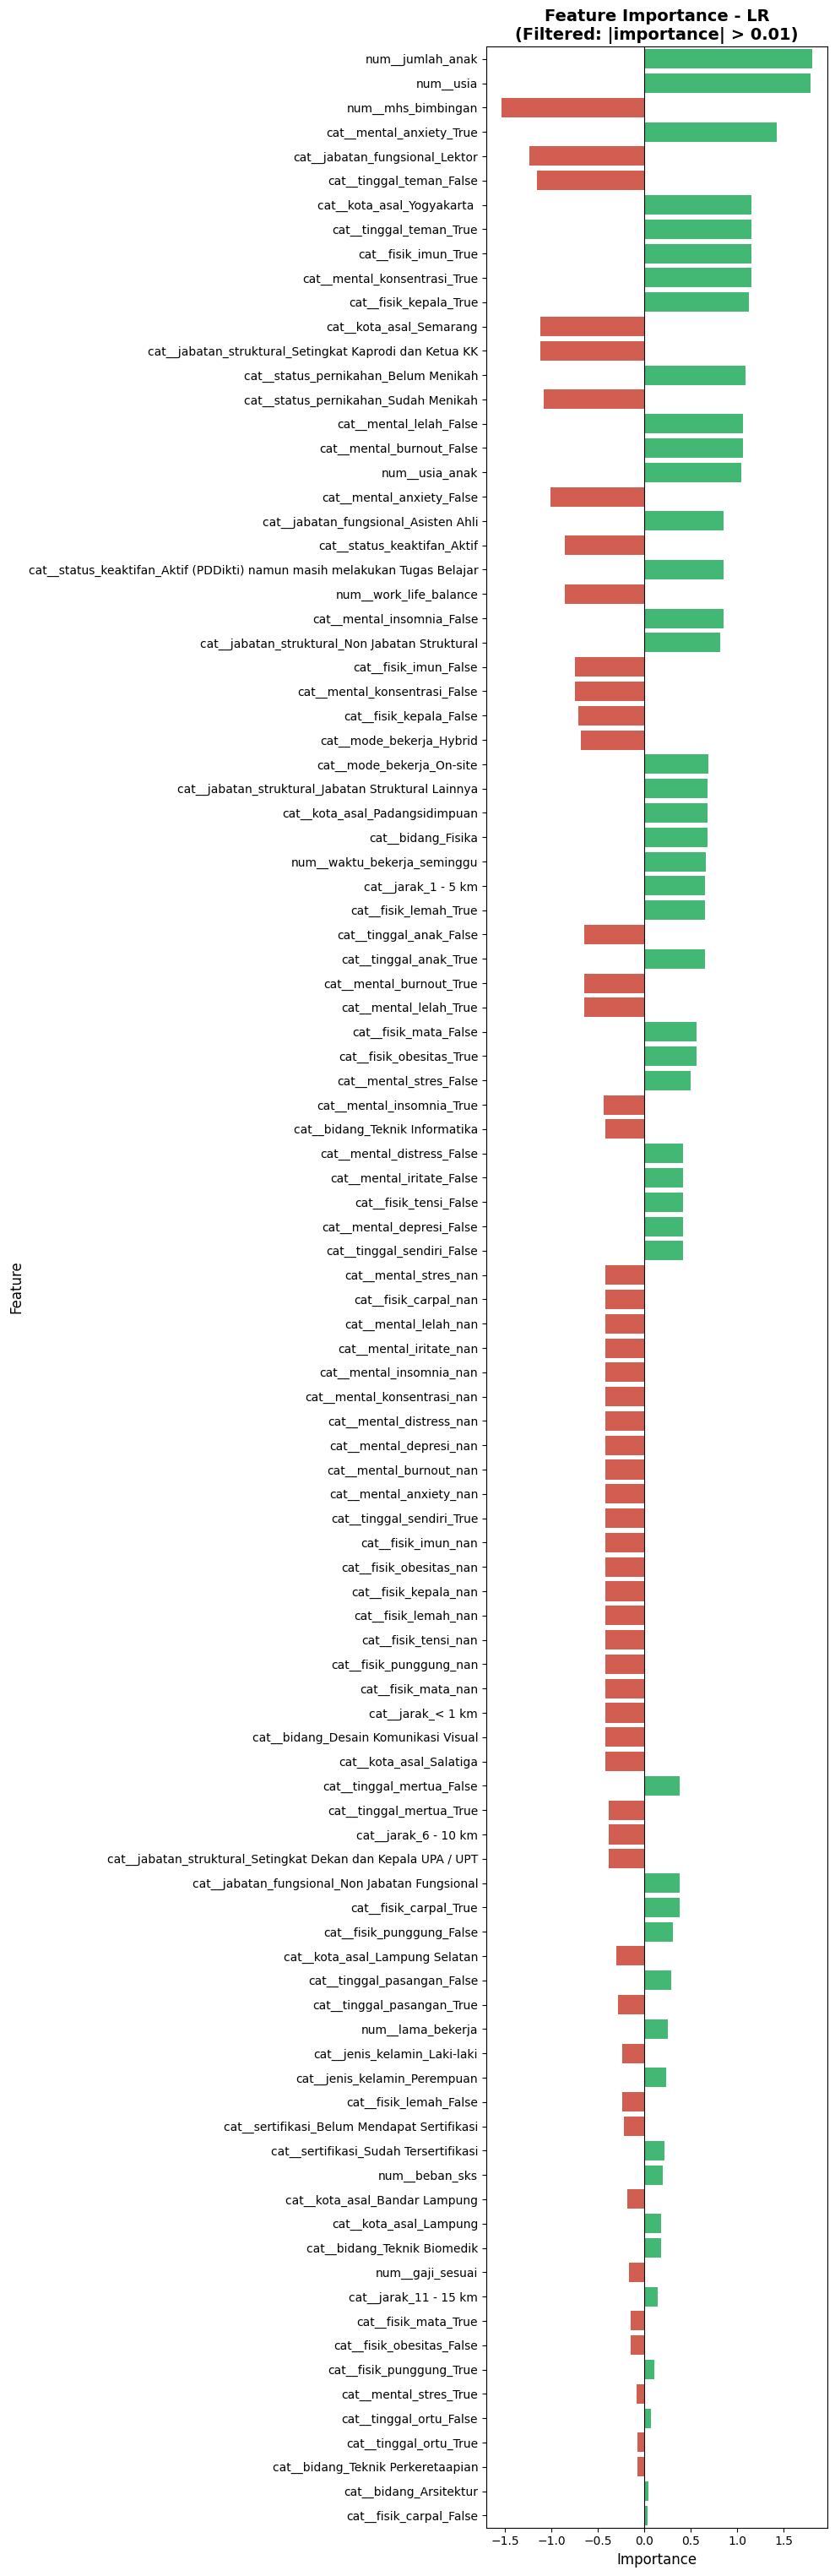


Model: XGB
Showing 5 features with |importance| > 0.01


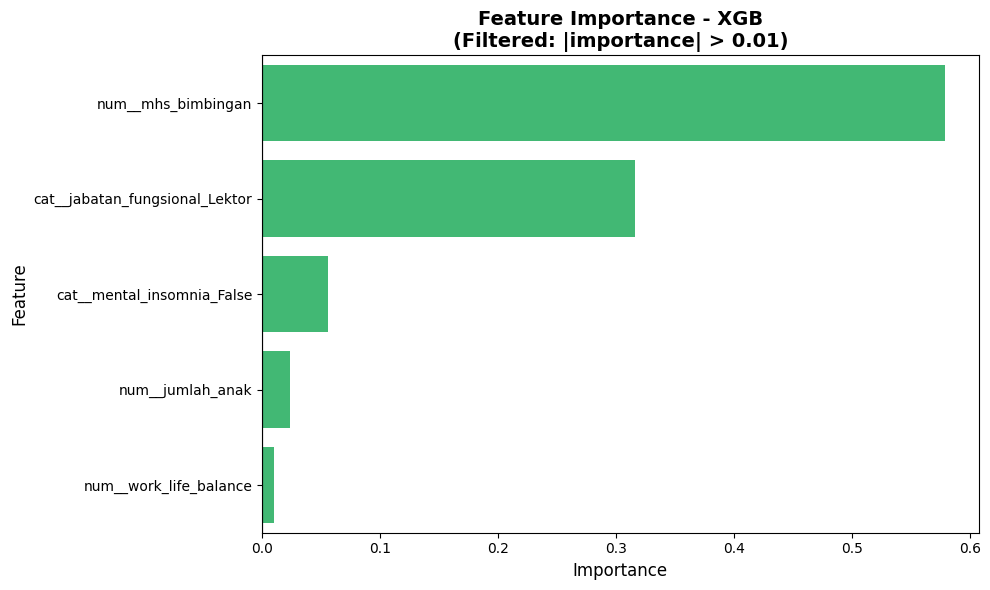


Model: RFR
Showing 24 features with |importance| > 0.01


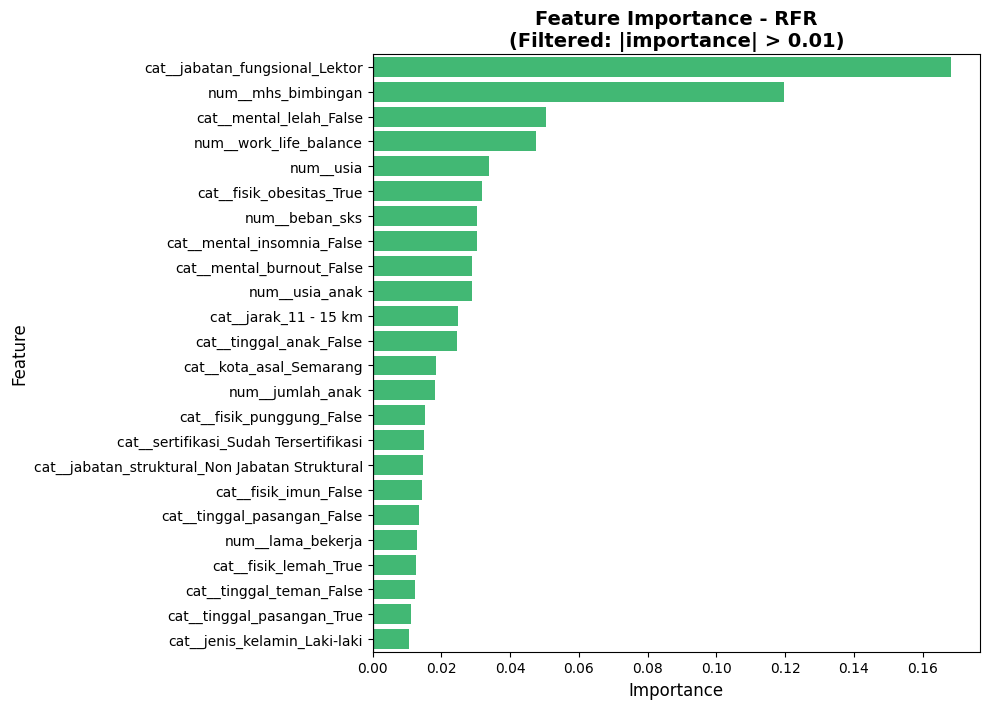


Model: GBR
Showing 12 features with |importance| > 0.01


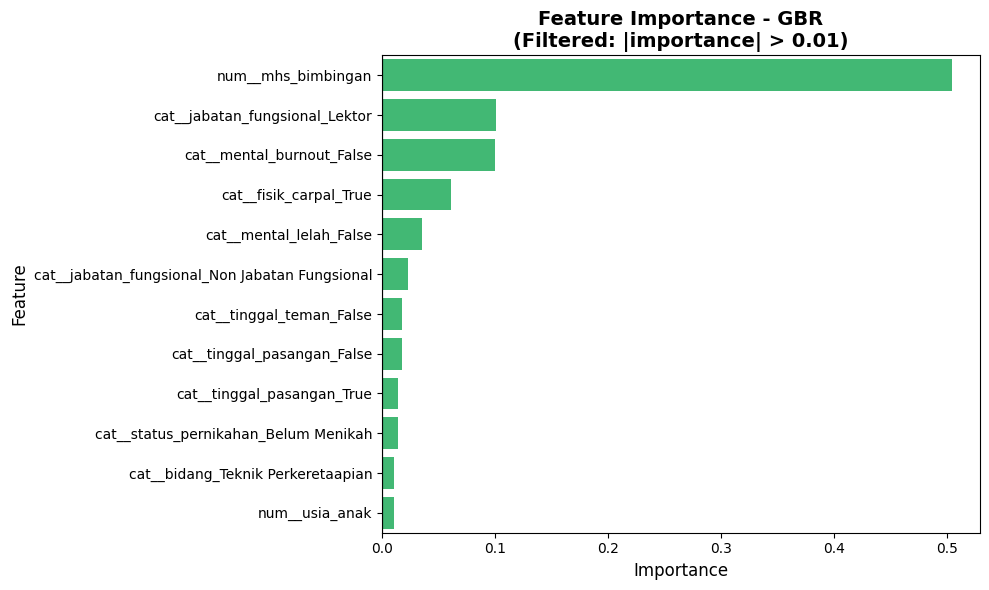


Model: SVR
Showing 4 features with |importance| > 0.01
Showing 4 features with |importance| > 0.01


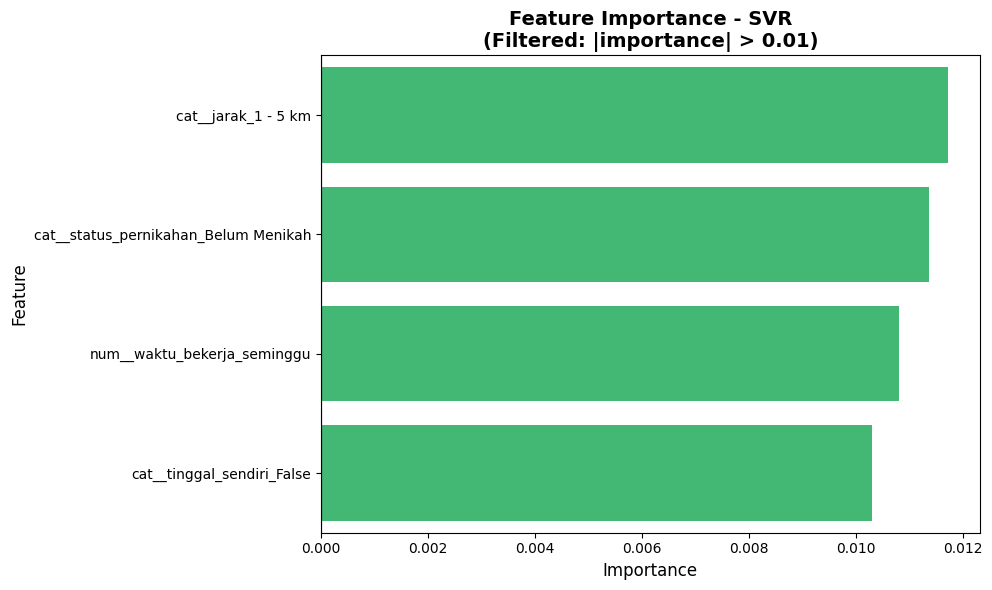

In [13]:
def plot_feature_importance(model, model_name, X, y, threshold=0.01, top_n=None):
    """
    Plot feature importance, filtering out features with values near zero.
    
    Parameters:
    -----------
    model : Pipeline
        Trained model pipeline
    model_name : str
        Name of the model
    X : DataFrame
        Feature data
    y : Series
        Target data
    threshold : float, default=0.01
        Minimum absolute importance value to include. Features with |importance| <= threshold will be excluded.
        - Use 0.01 for most cases (removes very weak features)
        - Use 0.05 for stricter filtering (only show strongest features)
        - Use 0.001 for minimal filtering
    top_n : int, optional
        If specified, only show top N most important features (after filtering by threshold)
    """
    importance = get_feature_importance(model, model_name, X, y)
    if importance is None:
        print(f"No feature importance available for {model_name}")
        return
    
    # Convert to DataFrame
    df_imp = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
    
    # Filter features with values near zero (absolute value > threshold)
    df_imp = df_imp[df_imp['Importance'].abs() > threshold]

    if df_imp.empty:
        print(f"All features have importance below threshold ({threshold}) for {model_name}")
        return

    # Sort by importance (descending by absolute value)
    df_imp = df_imp.sort_values(by='Importance', key=lambda x: x.abs(), ascending=False)
    
    # Optionally limit to top N features
    if top_n is not None:
        df_imp = df_imp.head(top_n)
        print(f"Showing top {len(df_imp)} features (threshold={threshold})")
    else:
        print(f"Showing {len(df_imp)} features with |importance| > {threshold}")

    # Create the plot
    plt.figure(figsize=(10, max(6, len(df_imp) * 0.3)))
    
    # Use different colors for positive and negative importance
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in df_imp['Importance']]
    
    sns.barplot(data=df_imp, x='Importance', y='Feature', palette=colors, hue='Feature', legend=False)
    plt.title(f'Feature Importance - {model_name}\n(Filtered: |importance| > {threshold})', fontsize=14, fontweight='bold')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.tight_layout()
    plt.show()

# === Examples with different threshold values ===
print("="*80)
print("FEATURE IMPORTANCE VISUALIZATION")
print("="*80)

for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Model: {name}")
    print(f"{'='*80}")
    
    # Option 1: Default threshold (0.01) - removes very weak features
    plot_feature_importance(model, name, X, y, threshold=0.01)
    
    # Option 2: Show only top 15 most important features
    # plot_feature_importance(model, name, X, y, threshold=0.01, top_n=15)
    
    # Option 3: Stricter filtering (only strong features)
    # plot_feature_importance(model, name, X, y, threshold=0.05)

## Saving the Importance Value as CSV

In [14]:
# Calculate feature importances for all models
# Use the already defined X and y from earlier
feature_importances = {}
for name, model in models.items():
    importance = get_feature_importance(model, name, X, y)
    if importance:
        # Convert to unsorted dict for DataFrame creation
        feature_importances[name] = importance

# Create a DataFrame from the feature importances
df_importance = pd.DataFrame(feature_importances)

# Sort the DataFrame by the average importance across all models
df_importance['avg_importance'] = df_importance.abs().mean(axis=1)  # Use absolute values for averaging
df_importance = df_importance.sort_values('avg_importance', ascending=False)
df_importance = df_importance.drop('avg_importance', axis=1)

# Rename the index to include the categorical labels (cleaner names)
new_index = []
for feature in df_importance.index:
    if feature.startswith('cat__'):
        parts = feature.split('__')
        if len(parts) == 3:
            new_index.append(f"{parts[1]}_{parts[2]}")
        else:
            new_index.append(feature)
    elif feature.startswith('num__'):
        # Remove 'num__' prefix for cleaner names
        new_index.append(feature.replace('num__', ''))
    else:
        new_index.append(feature)
df_importance.index = new_index

# Save the DataFrame to a CSV file
df_importance.to_csv('feature_importance_comparison.csv')

print("Feature importance comparison has been saved to 'feature_importance_comparison.csv'")
print(f"\nTotal features saved: {len(df_importance)}")
print(f"\nTop 10 most important features (by average):")
print(df_importance.abs().mean(axis=1).head(10))

Feature importance comparison has been saved to 'feature_importance_comparison.csv'

Total features saved: 104

Top 10 most important features (by average):
mhs_bimbingan                     0.547710
cat__jabatan_fungsional_Lektor    0.454561
jumlah_anak                       0.369850
usia                              0.369202
cat__mental_anxiety_True          0.357947
cat__mental_burnout_False         0.297224
cat__mental_konsentrasi_True      0.291641
cat__fisik_imun_True              0.290402
cat__mental_lelah_False           0.286488
cat__fisik_kepala_True            0.283339
dtype: float64
